In [1]:
#Pandas es uyn alibreria que permite trabajar con
#dataframe, es decir colecciones de datos indexados y con accesos por referencias
#pandas depende de numpy por lo que tambien debe ser importada esta libreria
import numpy as np
import pandas as pd

In [6]:
#data trabajando con series, en pandas una serie es un vector indexado
#pueden trabajar tipos d edatos distintos
data=pd.Series([2,5.8,2,1.2,"valor"])
print(data)
print(data.index)#indica valores de los indices, inicio, fin y avance
print(data.values)#valores en los indices
print(data[1])#acceso al valor de un indice

0        2
1      5.8
2        2
3      1.2
4    valor
dtype: object
RangeIndex(start=0, stop=5, step=1)
[2 5.8 2 1.2 'valor']
5.8


In [8]:
#series pueden ser inicializadas usando numpy
#definir indices de los valores en la serie
data=pd.Series([2,5,6,1],index=["a","b","c","d"])#en index estaran los alias de los valores
print(data)
print(data["b"])

a    2
b    5
c    6
d    1
dtype: int64
5


In [13]:
#series pueden ser inicializadas usando un diccionario
poblacion = {'Arica y Parinacota': 243149,
                   'Antofagasta': 631875,
                   'Metropolitana de Santiago': 7399042,
                   'Valparaiso': 1842880,
                   'Bíobío': 2127902,
                   'Magallanes y Antártica Chilena': 165547}
print(poblacion)
print("**********")
poblacion=pd.Series(poblacion)
print(poblacion)
print(poblacion["Antofagasta"])#entregará solo el dato


{'Arica y Parinacota': 243149, 'Antofagasta': 631875, 'Metropolitana de Santiago': 7399042, 'Valparaiso': 1842880, 'Bíobío': 2127902, 'Magallanes y Antártica Chilena': 165547}
**********
Arica y Parinacota                 243149
Antofagasta                        631875
Metropolitana de Santiago         7399042
Valparaiso                        1842880
Bíobío                            2127902
Magallanes y Antártica Chilena     165547
dtype: int64
631875


In [14]:
#Dataframes son para trabajar con dos dimensiones
# a partir de diccionario se crea una nueva serie
#en poblacion estan almacenados los datos 
#areas
areas = {'Arica y Parinacota': 16873.3,
             'Antofagasta': 126049.1,
             'Metropolitana de Santiago': 15403.2,
             'Valparaiso': 16396.1,
             'Bíobío': 37068.7,
             'Magallanes y Antártica Chilena': 1382291.1}
area = pd.Series(areas)
area

Arica y Parinacota                  16873.3
Antofagasta                        126049.1
Metropolitana de Santiago           15403.2
Valparaiso                          16396.1
Bíobío                              37068.7
Magallanes y Antártica Chilena    1382291.1
dtype: float64

In [26]:
#dataframe
regiones=pd.DataFrame({'poblacion':poblacion,'area':area})#se deben agregar como diccionarios, se pueden agregar varias columnas
print(regiones)
print(regiones.index)#indices del dataframe
print(regiones.columns)#columnas del dataframe
print(regiones["poblacion"])#muestra solo las poblaciones

                                poblacion       area
Arica y Parinacota                 243149    16873.3
Antofagasta                        631875   126049.1
Metropolitana de Santiago         7399042    15403.2
Valparaiso                        1842880    16396.1
Bíobío                            2127902    37068.7
Magallanes y Antártica Chilena     165547  1382291.1
Index(['Arica y Parinacota', 'Antofagasta', 'Metropolitana de Santiago',
       'Valparaiso', 'Bíobío', 'Magallanes y Antártica Chilena'],
      dtype='object')
Index(['poblacion', 'area'], dtype='object')
Arica y Parinacota                 243149
Antofagasta                        631875
Metropolitana de Santiago         7399042
Valparaiso                        1842880
Bíobío                            2127902
Magallanes y Antártica Chilena     165547
Name: poblacion, dtype: int64


In [27]:
#trabajo con archivos csv
#pandas permite cargar data desde un csv
#archivos
regiones='data/chile_regiones.csv'
provincias='data/chile_provincias.csv'
comunas='data/chile_comunas.csv'
regiones=pd.read_csv(regiones, header=0, sep=',')#los parametros son el archivo, la fila que tiene los nombres d elas columnas y el separador
#la , por defecto, pero depende de la construccion del archivo
provincias=pd.read_csv(provincias, header=0, sep=',')
comunas=pd.read_csv(comunas, header=0, sep=',')

In [28]:
print('regiones: ', regiones.columns.values.tolist())
print('provincias: ', provincias.columns.values.tolist())
print('comunas: ', comunas.columns.values.tolist())

regiones:  ['RegionID', 'RegionNombre', 'RegionOrdinal']
provincias:  ['ProvinciaID', 'ProvinciaNombre', 'RegionID']
comunas:  ['ComunaID', 'ComunaNombre', 'ProvinciaID']


In [30]:
print(regiones.head())
print(provincias.head())
print(comunas.head())

   RegionID          RegionNombre RegionOrdinal
0         1  'Arica y Parinacota'          'XV'
1         2            'Tarapacá'           'I'
2         3         'Antofagasta'          'II'
3         4             'Atacama'         'III'
4         5            'Coquimbo'          'IV'
   ProvinciaID ProvinciaNombre  RegionID
0            1         'Arica'         1
1            2    'Parinacota'         1
2            3       'Iquique'         2
3            4  'El Tamarugal'         2
4            5   'Antofagasta'         3
   ComunaID     ComunaNombre  ProvinciaID
0         1          'Arica'            1
1         2      'Camarones'            1
2         3  'General Lagos'            2
3         4          'Putre'            2
4         5  'Alto Hospicio'            3


In [31]:
#unir datas
regiones_provincias=pd.merge(regiones, provincias, how='outer')#une segun dato comun
regiones_provincias.head()

,RegionID,RegionNombre,RegionOrdinal,ProvinciaID,ProvinciaNombre
0,1,'Arica y Parinacota','XV',1,'Arica'
1,1,'Arica y Parinacota','XV',2,'Parinacota'
2,2,'Tarapacá','I',3,'Iquique'
3,2,'Tarapacá','I',4,'El Tamarugal'
4,3,'Antofagasta','II',5,'Antofagasta'


In [32]:
provincias_comunas=pd.merge(provincias, comunas, how='outer')
provincias_comunas.head()

,ProvinciaID,ProvinciaNombre,RegionID,ComunaID,ComunaNombre
0,1,'Arica',1,1,'Arica'
1,1,'Arica',1,2,'Camarones'
2,2,'Parinacota',1,3,'General Lagos'
3,2,'Parinacota',1,4,'Putre'
4,3,'Iquique',2,5,'Alto Hospicio'


In [35]:
regiones_provincias_comunas=pd.merge(regiones_provincias, comunas, how='outer')
regiones_provincias_comunas.index.name='ID'
regiones_provincias_comunas.head(10)

,RegionID,RegionNombre,RegionOrdinal,ProvinciaID,ProvinciaNombre,ComunaID,ComunaNombre
ID,,,,,,,
0,1,'Arica y Parinacota','XV',1,'Arica',1,'Arica'
1,1,'Arica y Parinacota','XV',1,'Arica',2,'Camarones'
2,1,'Arica y Parinacota','XV',2,'Parinacota',3,'General Lagos'
3,1,'Arica y Parinacota','XV',2,'Parinacota',4,'Putre'
4,2,'Tarapacá','I',3,'Iquique',5,'Alto Hospicio'
5,2,'Tarapacá','I',3,'Iquique',6,'Iquique'
6,2,'Tarapacá','I',4,'El Tamarugal',7,'Camiña'
7,2,'Tarapacá','I',4,'El Tamarugal',8,'Colchane'
8,2,'Tarapacá','I',4,'El Tamarugal',9,'Huara'


In [36]:
regiones_provincias_comunas.to_csv('salida.csv', index=False)#guarda en formato csv

In [38]:
regiones_provincias_comunas.loc[3]#obtener cuarto registro

RegionID                              1
RegionNombre       'Arica y Parinacota'
RegionOrdinal                      'XV'
ProvinciaID                           2
ProvinciaNombre            'Parinacota'
ComunaID                              4
ComunaNombre                    'Putre'
Name: 3, dtype: object

In [40]:
data=pd.read_csv('salida.csv',header=0,sep=',')
print(data.head())

   RegionID          RegionNombre RegionOrdinal  ProvinciaID ProvinciaNombre  \
0         1  'Arica y Parinacota'          'XV'            1         'Arica'   
1         1  'Arica y Parinacota'          'XV'            1         'Arica'   
2         1  'Arica y Parinacota'          'XV'            2    'Parinacota'   
3         1  'Arica y Parinacota'          'XV'            2    'Parinacota'   
4         2            'Tarapacá'           'I'            3       'Iquique'   

   ComunaID     ComunaNombre  
0         1          'Arica'  
1         2      'Camarones'  
2         3  'General Lagos'  
3         4          'Putre'  
4         5  'Alto Hospicio'  


In [42]:
data_sort=data.sort_values('RegionOrdinal')
data_sort.head()

,RegionID,RegionNombre,RegionOrdinal,ProvinciaID,ProvinciaNombre,ComunaID,ComunaNombre
10,2,'Tarapacá','I',4,'El Tamarugal',11,'Pozo Almonte'
4,2,'Tarapacá','I',3,'Iquique',5,'Alto Hospicio'
5,2,'Tarapacá','I',3,'Iquique',6,'Iquique'
6,2,'Tarapacá','I',4,'El Tamarugal',7,'Camiña'
7,2,'Tarapacá','I',4,'El Tamarugal',8,'Colchane'


In [43]:
#datos de proyectos para graficar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
#configuracion del plot
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'axes.titlepad': 20,
         'axes.titlesize': 24,
         'axes.labelpad': 20,
         'axes.labelsize': 20,
         'lines.linewidth': 3,
         'lines.markersize': 10,
         'xtick.labelsize': 16,
         'ytick.labelsize': 16}
plt.rcParams.update(params)
sns.color_palette("bright")

# También es posible limitar el número de registros que imprimirá en pantalla Pandas
pd.set_option('display.max_rows', 100)

In [44]:
#cargar datos
fondecyt = pd.read_csv('data/tabular/fondecyt postdoc 2007-2017.csv')
fondecyt.head()
fondecyt=fondecyt.rename(columns = {'año':'Año', 'n_concursados':'Concursados', 'n_aprobados':'Aprobados', 
                                   'monto_solicitado':'Recursos solicitados', 'monto_aprobado':'Recursos aprobados'})
fondecyt['Tasa de aprobación']=np.round(fondecyt['Aprobados']/fondecyt['Concursados']*100,decimals=1)
fondecyt_postdoc=fondecyt.copy()
fondecyt.head()

,Año,Concursados,Aprobados,Recursos solicitados,Recursos aprobados,Tasa de aprobación
0,2007,58,37,NaN,922052,63.8
1,2008,110,74,1684744.0,1132227,67.3
2,2009,76,66,1245880.0,1084471,86.8
3,2010,140,80,6856883.0,3959662,57.1
4,2011,172,90,8686381.0,4662685,52.3


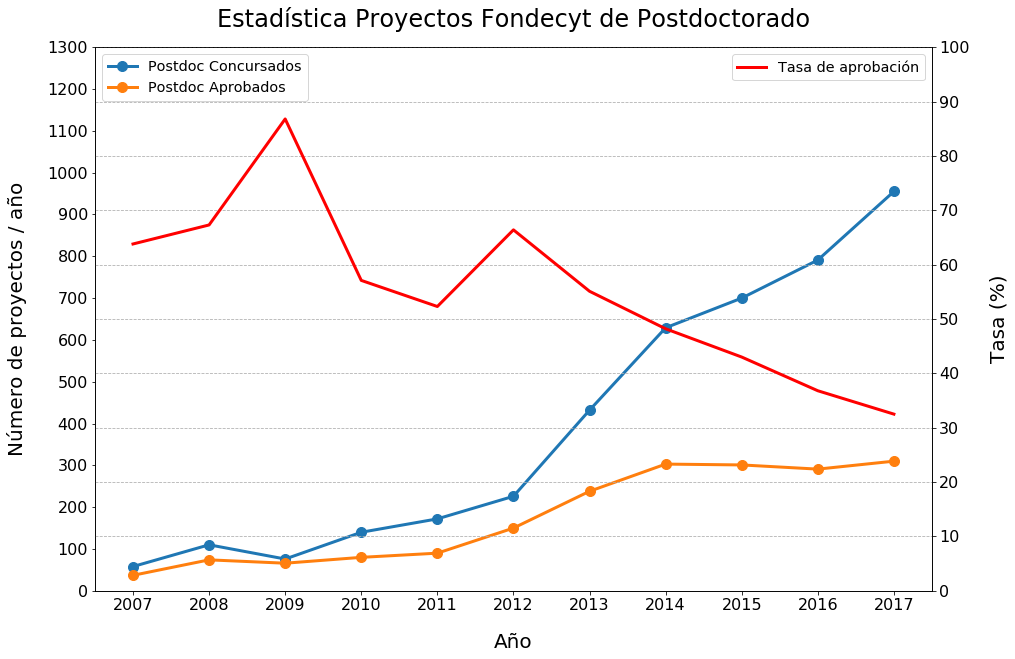

In [46]:
fig, ax = plt.subplots(figsize=(15, 10))
ax2 = ax.twinx()

fondecyt.plot(kind='line', x='Año', y='Concursados', marker='o', markersize=10, ax=ax, label='Postdoc Concursados')
fondecyt.plot(kind='line', x='Año', y='Aprobados', marker='o', markersize=10, ax=ax, label='Postdoc Aprobados')
ax.set_xlim([2006.5,2017.5])
ax.set_ylim([0,1300])
ax.yaxis.set_ticks(np.arange(0, 1400, 100))
ax.legend(loc=2)

fondecyt.plot(kind='line', x='Año', y='Tasa de aprobación', color='red', grid=True, ax=ax2)
ax2.set_ylim([0,100])
ax2.yaxis.set_ticks(np.arange(0,110,10))
ax2.set_xlim([2006.5,2017.5])
ax2.xaxis.set_ticks(np.arange(2007, 2018, 1))
ax2.grid(linestyle='--')
ax2.legend(loc=1)

ax.set_title('Estadística Proyectos Fondecyt de Postdoctorado')
ax.set_ylabel('Número de proyectos / año')
ax2.set_ylabel('Tasa (%)')

fig.savefig('estadistica_proyectos_fondecyt_postdoc.pdf')
fig.savefig('estadistica_proyectos_fondecyt_postdoc.png')